In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Import the training data sets
training_1 = np.array(pd.read_csv("./data_04.dat", delim_whitespace=True))
training_2 = np.array(pd.read_csv("./data_05.dat", delim_whitespace=True))

# Split the data to [x,y] pairs for each class. a1 means all coordinate pairs of class A
a1, b1 = [training_1[training_1[:, 2] == 1, :-1], training_1[training_1[:, 2] == 2, :-1]]
a2, b2 = [training_2[training_2[:, 2] == 1, :-1], training_2[training_2[:, 2] == 2, :-1]]

X1, y1 = [training_1[:,:-1], training_1[:,-1]]
X2, y2 = [training_2[:,:-1], training_2[:,-1]]


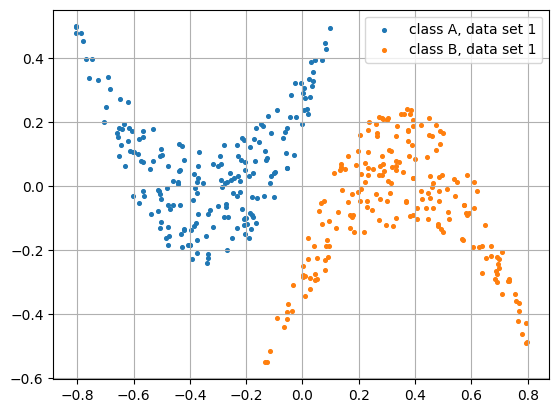

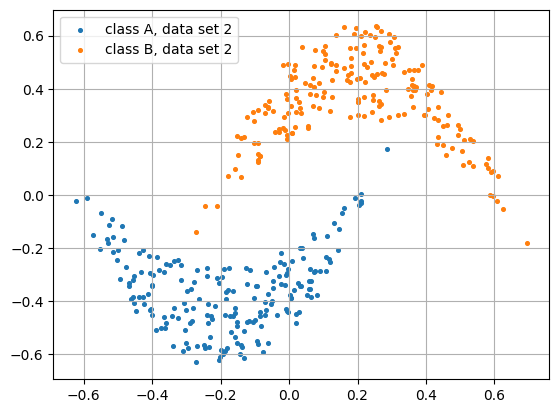

In [11]:


plt.scatter(a1[:,0], a1[:,1], s=7, label="class A, data set 1")
plt.scatter(b1[:,0], b1[:,1], s=7, label="class B, data set 1")
plt.grid()
plt.legend()
plt.show()

plt.scatter(a2[:,0], a2[:,1], s=7, label="class A, data set 2")
plt.scatter(b2[:,0], b2[:,1], s=7, label="class B, data set 2")
plt.grid()
plt.legend()
plt.show()



We can directly see that data set 2 is going to require a multi-layered perceptron net, since they are not linearly separable

<h2>Linearly separable data set:</h2>

In [3]:
alpha = 0.3 # Learning rate

<h3>Initialize weights</h3>

In [31]:
def step(x):
    return np.where(x > 0, 1, 0)

In [2]:
class Perceptron:

    def __init__(self, learning_rate=0.3, n_iters = 1000) -> None:
        self.eta = learning_rate
        self.n_iters = n_iters
        self.activation_function = step
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y > 1, 1, 0)

        # Initialization
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters): # Continuation
            for idx, x_i in enumerate(X): # Activation
                d = y_[idx] # Desired response
                #Computation of actual response:
                y_hat = self.activation_function(np.dot(x_i, self.weights) + self.bias)

                # Adaptation of weight vector
                self.weights += self.eta * (d - y_hat) * x_i
                self.bias += self.eta * (d - y_hat)

    
    def predict(self, X):
        return self.activation_function(np.dot(X, self.weights) + self.bias)



Accuracy set 2, 1 epoch/s: 91.47869674185463%


[0.91478,
 0.909774,
 0.9022556,
 0.90977443,
 0.9072682,
 0.9072682,
 0.9172932,
 0.9072682]

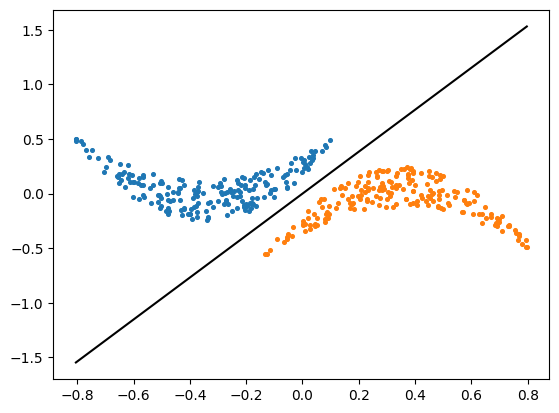

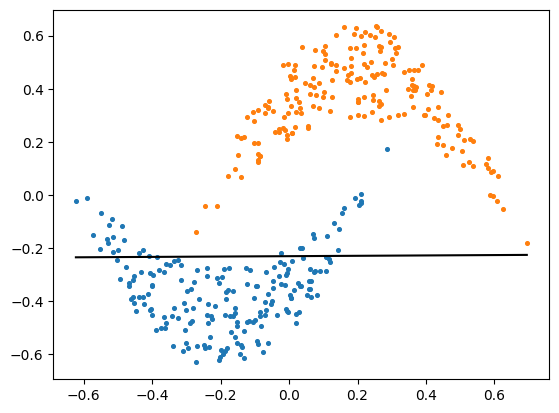

In [35]:
for epochs in [1]:# 2, 3]:#, 5, 10, 20, 30, 50]:
    #Training
    P_1 = Perceptron(0.3, epochs * np.size(training_1))
    P_2 = Perceptron(0.3, epochs * np.size(training_1))

    P_1.fit(X1, y1)
    P_2.fit(X2, y2)

    predictions_1 = P_1.predict(X1)
    predictions_2 = P_2.predict(X2)

    accuracy_1 = 1 - sum([pred_i == known_i for pred_i, known_i in zip(predictions_1, y1)]) / len(y1)
    accuracy_2 = 1 - sum([pred_i == known_i for pred_i, known_i in zip(predictions_2, y2)]) / len(y2)

    print(f"Accuracy set 2, {epochs} epoch/s: {100*accuracy_2}%")

    x01_1, x01_2 = [np.amin(X1[:,0]), np.amax(X1[:,0])]
    x02_1, x02_2 = [np.amin(X2[:,0]), np.amax(X2[:,0])]

    x1_1 = (-P_1.weights[0] * x01_1 - P_1.bias) / P_1.weights[1]
    x1_2 = (-P_1.weights[0] * x01_2 - P_1.bias) / P_1.weights[1]
    x2_1 = (-P_2.weights[0] * x02_1 - P_2.bias) / P_2.weights[1]
    x2_2 = (-P_2.weights[0] * x02_2 - P_2.bias) / P_2.weights[1]

    fig1 = plt.figure()
    ax1 = plt.subplot(1,1,1)
    plt.scatter(a1[:,0], a1[:,1], s=7, label="class A, data set 1")
    plt.scatter(b1[:,0], b1[:,1], s=7, label="class B, data set 1")
    ax1.plot([x01_1, x01_2], [x1_1, x1_2], "k")
    plt.savefig(f"./X1_epochs{epochs}.png")

    fig2 = plt.figure()
    ax2 = plt.subplot(1,1,1)
    plt.scatter(a2[:,0], a2[:,1], s=7, label="class A, data set 2")
    plt.scatter(b2[:,0], b2[:,1], s=7, label="class B, data set 2")
    ax2.plot([x02_1, x02_2], [x2_1, x2_2], "k")
    plt.savefig(f"./X2_epochs{epochs}.png")


[.91478, .909774, .9022556, .90977443, .9072682, .9072682, .9172932, .9072682]



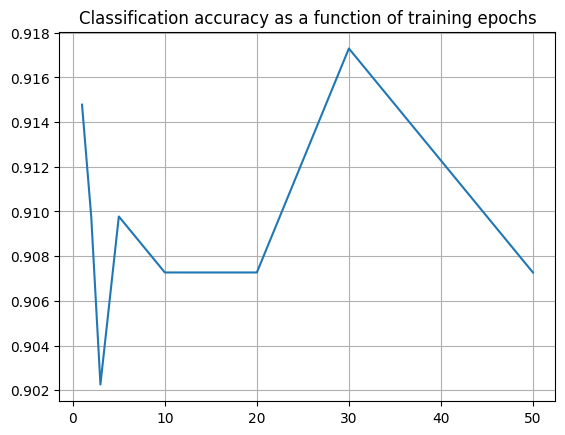

In [24]:
accuracies = [.91478, .909774, .9022556, .90977443, .9072682, .9072682, .9172932, .9072682]
epochs = [1, 2, 3, 5, 10, 20, 30, 50]
plt.plot(epochs, accuracies)
plt.grid()
plt.title("Classification accuracy as a function of training epochs")
plt.show()